#Artificial Intelligence Work Prompt Aniket Biswal

First, we have to import all the modules and packages we will be using:

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

Next, we have to load the data in using Pandas:

In [32]:
SHEET_ID = "1y_g37nbDgHC-zm1y_WGfThBt5wipMxnFSDcSZT6AQq4"
SHEET1 = "XTern_TrainData"
SHEET2 = "Menu"
url1 = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET1}'
url2 = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET2}'
train_df = pd.read_csv(url1)
menu_df = pd.read_csv(url2)



Now that we have read in the data into train_df and menu_df, we can do a preliminary data analysis to view distributions of certain data:

Year 3    2719
Year 2    2273
Year 1       5
Year 4       3
Name: Year, dtype: int64


<Axes: >

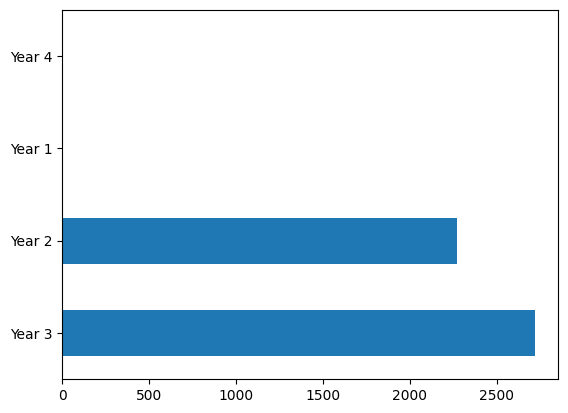

In [36]:
print(train_df['Year'].value_counts())
train_df.Year.value_counts().plot(kind='barh')

Chemistry                  640
Biology                    635
Astronomy                  619
Physics                    610
Mathematics                582
Economics                  511
Business Administration    334
Political Science          309
Marketing                  239
Anthropology               146
Finance                    135
Psychology                  76
Accounting                  62
Sociology                   31
International Business      29
Music                       21
Mechanical Engineering      11
Philosophy                   4
Fine Arts                    3
Civil Engineering            3
Name: Major, dtype: int64


<Axes: >

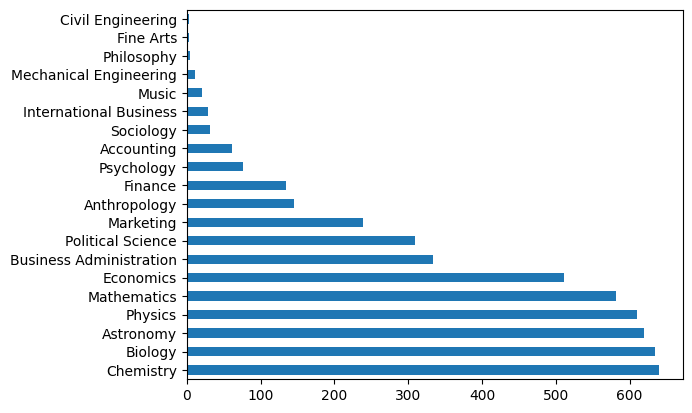

In [37]:
print(train_df['Major'].value_counts())
train_df.Major.value_counts().plot(kind='barh')

Butler University                                            1614
Indiana State University                                     1309
Ball State University                                        1085
Indiana University-Purdue University Indianapolis (IUPUI)     682
University of Notre Dame                                      144
University of Evansville                                      143
Indiana University Bloomington                                 12
Valparaiso University                                           9
Purdue University                                               1
DePauw University                                               1
Name: University, dtype: int64


<Axes: >

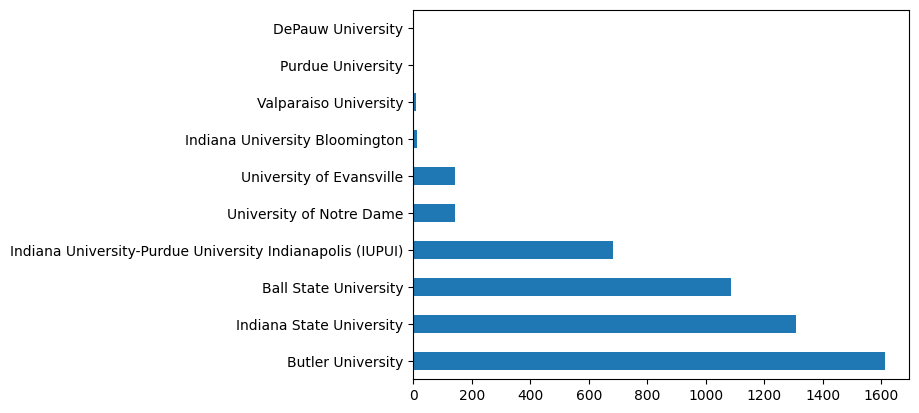

In [38]:
print(train_df['University'].value_counts())
train_df.University.value_counts().plot(kind='barh')

Sugar Cream Pie                                             512
Indiana Pork Chili                                          510
Cornbread Hush Puppies                                      510
Sweet Potato Fries                                          508
Ultimate Grilled Cheese Sandwich (with bacon and tomato)    503
Indiana Buffalo Chicken Tacos (3 tacos)                     496
Indiana Corn on the Cob (brushed with garlic butter)        495
Breaded Pork Tenderloin Sandwich                            494
Fried Catfish Basket                                        490
Hoosier BBQ Pulled Pork Sandwich                            482
Name: Order, dtype: int64


<Axes: >

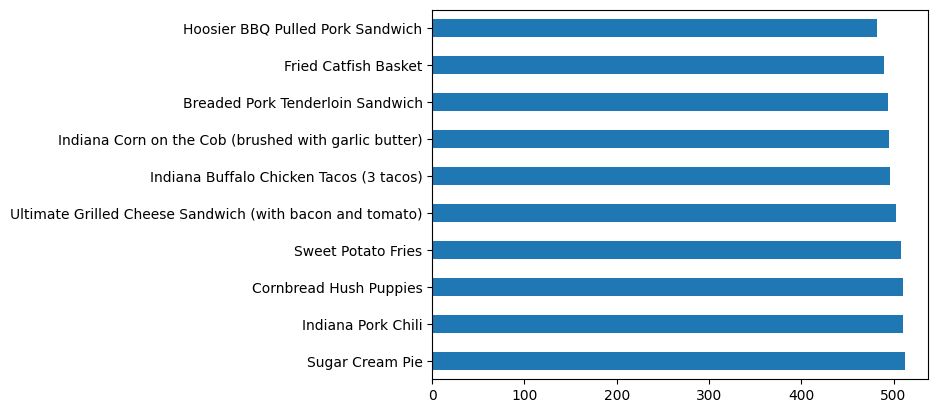

In [39]:
print(train_df['Order'].value_counts())
train_df.Order.value_counts().plot(kind='barh')

13    1316
12    1314
14     883
11     857
15     282
10     247
16      49
9       40
8        8
17       4
Name: Time, dtype: int64


<Axes: >

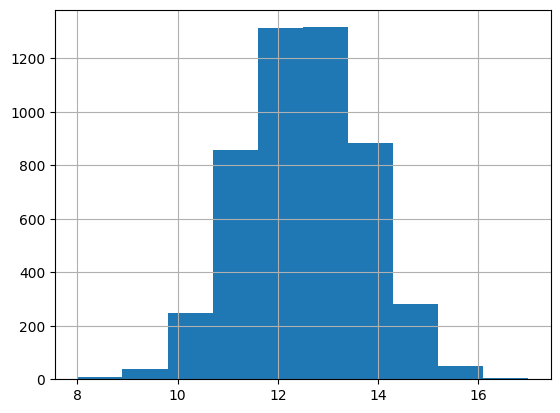

In [44]:
print(train_df['Time'].value_counts())
train_df.Time.hist(bins=10)

#Implications of Data storage, collection, biases
1. Ethical implications:
In terms of ethical implications for data collection, collecting data about one's major and university are quite commonplace and so there is not much of an issue of ethics here. The same goes for storage as many people have their major and university information publicly avaiable.
2. Business Outcomes:
With this data available and the following model, businesses will be better able to cater their menus and order options to students at specific universities and of specific majors. Not only that, businesses will be able to scope out compeititon based on their popularity in their location.
3. Technical implications:
With this data and following model, we can futher utilize this technology towards other areas of interests, outside of just Food truck orders. We can use it to classify essentially any part of one's liking.

#Training and Testing the model
For this model, I used the K-Nearest Neighbor algorithm to classify one's menu order based off of their university characteristics such as Year, Major, University, and Time. First, I had to clean the data to convert the categorical values of Year, major, University, and Order to numeric values:

In [ ]:
#Replace Year i with just i
for i in range(len(train_df['Year'])):
    if train_df['Year'][i] == 'Year 1' :
        train_df['Year'][i] = 1
    elif train_df['Year'][i] == 'Year 2' :
        train_df['Year'][i] = 2
    elif train_df['Year'][i] == 'Year 3' :
        train_df['Year'][i] = 3
    elif train_df['Year'][i] == 'Year 4' :
        train_df['Year'][i] = 4

#Replace each unique Major with a numeric value
unique_majors = train_df['Major'].unique();
for i in range(len(train_df['Major'])):
    for j in range(len(unique_majors)):
        if train_df['Major'][i] == unique_majors[j]:
            train_df['Major'][i] = j

#Replace each unique university with a numeric value
unique_uni = train_df['University'].unique();
for i in range(len(train_df['University'])):
    for j in range(len(unique_uni)):
        if train_df['University'][i] == unique_uni[j]:
            train_df['University'][i] = j

#Replace each order with their corresponding order number
menu_nums = menu_df['Unnamed: 0']
for i in range(len(train_df['Order'])):
    for j in range(len(menu_nums)):
        if train_df['Order'][i] == menu_nums[j]:
            train_df['Order'][i] = j

Now that the data is cleaned, I created my x and y variables. x held the explanatory variables (Year, Major, University, time) and y held the response variable of Order
From there, I used the SK Learn built-in KNeighborsClassifier to train and test the model

In [31]:
x = train_df.iloc[:, :-1].values
y = train_df.iloc[:, 4].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[59  4  1  1  2 10  3  6  0  7]
 [ 5 45  5  5 12  9  2  7  0  1]
 [11  6 46  0  4  0  5  1 10  1]
 [ 0  3  1 62  6  0  0  4  7  1]
 [ 3 12  1 22 38  3  2  6 11  7]
 [ 9 14  0  1  0 67  9  5  0  3]
 [ 5  2  3  0  2  0 78  0  1  3]
 [ 5  5  5 12 11  4  7 62  1  3]
 [ 5  4 16 13  9  0  1 11 58  3]
 [ 8  3  9  3  4  2  2  1  9 65]]
                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.54      0.63      0.58        93
                                  Cornbread Hush Puppies       0.46      0.49      0.48        91
                                    Fried Catfish Basket       0.53      0.55      0.54        84
                        Hoosier BBQ Pulled Pork Sandwich       0.52      0.74      0.61        84
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.43      0.36      0.39       105
    Indiana Corn on the Cob (brushed with garlic butter)       0.71      0.62   

#Is this suitable course of action?
I think based off the work required to create this model, this is definitely a plasuible course of action to help FoodX to better predict their customers orders. With better data collection (more Year 1 and Year 4 students) and better models in the future, businesses should adopt this model to better their sales.